In [5]:
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def split_data_aug(data):
    train = data[(datetime.datetime(2014,4,1) <= data['date']) & (data['date'] < datetime.datetime(2014,8,1))]
    test = data[(datetime.datetime(2014,8,1) <= data['date']) & (data['date'] < datetime.datetime(2014,9,1))]
    return train, test

In [3]:
def split_data_sep(data):
    train = data[(datetime.datetime(2014,4,1) <= data['date']) & (data['date'] < datetime.datetime(2014,9,1))]
    test = data[(datetime.datetime(2014,9,1) <= data['date']) & (data['date'] < datetime.datetime(2014,10,1))]
    return train, test

In [89]:
def purchase_error(y_true, y_pred):
    return np.abs(y_true - y_pred) / np.abs(y_true)

def redeem_error(y_true, y_pred):
    return (y_true - y_pred)/ np.abs(y_true)

def total_score(purchase_pred, purchase_true, redeem_pred, redeem_true, threshold=0.15):
    def transfer(x):
        if abs(x) > 0.3:
            return 0
        if x<0: # overpredict 
            return np.exp(x/threshold)*10
        else: 
            return np.exp(1.5*-x/threshold)*10
    redeem_score = sum(map(transfer, redeem_error(redeem_true, redeem_pred))) * 0.55
    return sum(map(lambda x : 0 if x > 0.3 else np.exp(-x/threshold)*10, purchase_error(purchase_true, purchase_pred))) * 0.45 + redeem_score

In [1]:
def get_submit_data(purchase_pred,redeem_pred):
    df = pd.DataFrame([[x for x in range(20140901,20140931)],purchase_pred,redeem_pred]).T
    df[0]= df[0].astype('int')
    df.loc[:,1:2] = df.loc[:,1:2].apply(lambda x: round(x,2))
    df.to_csv('dataset/tc_comp_predict_table.csv',index = False,header = None)
    return df

In [40]:
def plot_pr(purchase_pred,purchase_true,redeem_pred,redeem_true):
    plt.figure(figsize = (12,3))
    plt.subplot(1,2,1)
    plt.plot(purchase_pred,label = 'purchase_pred')
    plt.plot(purchase_true,label = 'redeem_true')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(redeem_pred,label = 'redeem_pred')
    plt.plot(redeem_true,label = 'redeem_true')
    plt.legend()
    plt.show()


## Modified Metrics

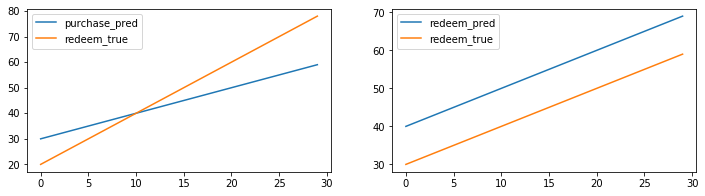

In [64]:
purchase_pred = np.arange(30,60)
purchase_true = np.arange(20,80,2)
redeem_pred = np.arange(40,70)
redeem_true = np.arange(30,60)
plot_pr(purchase_pred,purchase_true,redeem_pred,redeem_true)

In [87]:
a = total_score(purchase_pred, purchase_true, redeem_pred, redeem_true)
print(f"when redeem all over predict: the score is : {a}")

when redeem all over predict: the score is : 86.57069833967643


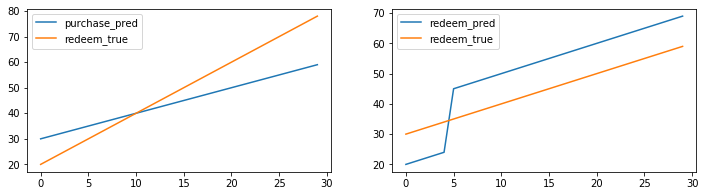

when some day redeem under predict: the score is : 86.08700404778833


In [95]:
purchase_pred = np.arange(30,60)
purchase_true = np.arange(20,80,2)
redeem_pred = np.arange(40,70)
redeem_true = np.arange(30,60)
redeem_pred[0:5] -= 20
plot_pr(purchase_pred,purchase_true,redeem_pred,redeem_true)
a = total_score(purchase_pred, purchase_true, redeem_pred, redeem_true)

print(f"when some day redeem under predict: the score is : {a}")

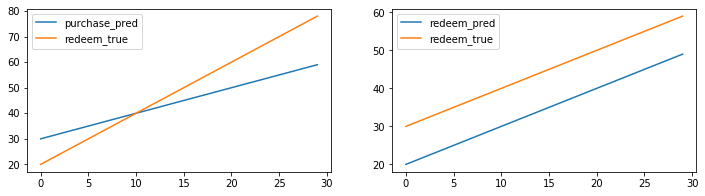

when redeem all under predict: the score is : 69.5529603027509


In [90]:
purchase_pred = np.arange(30,60)
purchase_true = np.arange(20,80,2)
redeem_pred = np.arange(20,50)
redeem_true = np.arange(30,60)
plot_pr(purchase_pred,purchase_true,redeem_pred,redeem_true)
a = total_score(purchase_pred, purchase_true, redeem_pred, redeem_true)
print(f"when redeem all under predict: the score is : {a}")